In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
df = load_breast_cancer(as_frame=True)

In [2]:
x=df['data']
y=df['target']

C:\Users\ram\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


                         accuracy  precision    recall
logistic regression      0.958042   0.955556  0.977273
Support vector machines  0.937063   0.933333  0.965517
Naive Bayes              0.937063   0.955556  0.945055
KNeighborsClassifier     0.951049   0.988889  0.936842
decision trees           0.895105   0.866667  0.962963


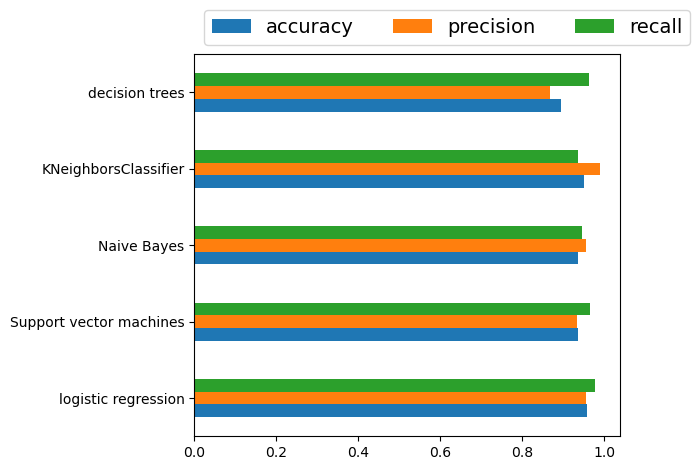

In [5]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=0)

from sklearn.preprocessing import StandardScaler
ss_train=StandardScaler()
xtrain=ss_train.fit_transform(xtrain)
ss_test=StandardScaler()
xtest=ss_test.fit_transform(xtest)

models={}

#logistic regression
from sklearn.linear_model import LogisticRegression
models['logistic regression']= LogisticRegression()

#support vector machines
from sklearn.svm import LinearSVC
models['Support vector machines']= LinearSVC()

#Naive bayes
from sklearn.naive_bayes import GaussianNB
models['Naive Bayes']= GaussianNB()

# K-Nearest neighbor
from sklearn.neighbors import KNeighborsClassifier
models['KNeighborsClassifier']= KNeighborsClassifier()

# Decision trees
from sklearn.tree import DecisionTreeClassifier
models['decision trees']=DecisionTreeClassifier()
from sklearn.metrics import accuracy_score,precision_score,recall_score

accuracy=precision=recall={}

for key in models.keys():    
    #fit the classifier
    models[key].fit(xtrain, ytrain)
    
    #make predictions
    predictions = models[key].predict(xtest)

    
    #calculate matrics
    accuracy[key]=accuracy_score(predictions,ytest)
    precision[key]=precision_score(predictions,ytest)
    recall[key]=recall_score(predictions,ytest)
    
import pandas as pd
df_model=pd.DataFrame(index=models.keys(),columns=["accuracy","precision","recall"])
df_model["accuracy"]=accuracy.values()
df_model["precision"]=precision.values()
df_model["recall"]=recall.values()
print(df_model)

ax=df_model.plot.barh()
ax.legend(
    ncol=len(models.keys()),
    bbox_to_anchor=(0,1),
    loc="lower left",
    prop={"size":14}
)
plt.tight_layout()